## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df = pd.read_csv('./ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [5]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [6]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [7]:
total_converted = df['converted'].sum()
total_users = df['user_id'].count()
proportion_converted = total_converted/total_users
print(proportion_converted)

0.119659193556


e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
pd.crosstab(df.group, df.landing_page)

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


f. Do any of the rows have missing values?

In [9]:
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df.loc[(df['group']=='treatment') & (df['landing_page']=='new_page')]
df2 = df2.append(df.loc[(df['group']=='control') & (df['landing_page']=='old_page')])
df2.head(10)

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
10,929503,2017-01-18 05:37:11.527370,treatment,new_page,0
11,834487,2017-01-21 22:37:47.774891,treatment,new_page,0
12,803683,2017-01-09 06:05:16.222706,treatment,new_page,0
13,944475,2017-01-22 01:31:09.573836,treatment,new_page,0
14,718956,2017-01-22 11:45:11.327945,treatment,new_page,0


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()

290584

In [13]:
df2.shape

(290585, 5)

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2 = df2.drop_duplicates(subset=['user_id'], keep='first')

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
total_converted2 = df2['converted'].sum()
total_users2 = df2['user_id'].count()
probability_conversion2 = total_converted2/total_users2
print(probability_conversion2)

0.119597087245


In [18]:
#Just checking what is going on and looking at the groups
df2.groupby(['group']).count()

,user_id,timestamp,landing_page,converted
group,,,,
control,145274,145274,145274,145274
treatment,145310,145310,145310,145310


b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
total_converted_control2= df2.loc[df2['group']=='control', 'converted'].sum()
total_users_control2 = df2.loc[df2['group']=='control', 'user_id'].count()
conversion_probablility_control = total_converted_control2/total_users_control2
print(conversion_probablility_control)

0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
total_converted_t2= df2.loc[df2['group']=='treatment', 'converted'].sum()
total_users_t2 = df2.loc[df2['group']=='treatment', 'user_id'].count()
conversion_probablility_t2 = total_converted_t2/total_users_t2
print(conversion_probablility_t2)

0.118808065515


d. What is the probability that an individual received the new page?

In [21]:
total_new= (df2['landing_page']=='new_page').sum()
print("total number of user that received new page",total_new)
total_users_new = len(df2.index)
print("Number of individuals in study",total_users_new)
conversion_probablility_new = total_new/total_users_new
print(conversion_probablility_new)

total number of user that received new page 145310
Number of individuals in study 290584
0.500061944223


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

In [22]:
df2.groupby(['landing_page']).count()

,user_id,timestamp,group,converted
landing_page,,,,
new_page,145310,145310,145310,145310
old_page,145274,145274,145274,145274


**Your answer goes here.**

>>The new landing page has a total of 145311 that have converted and the the old landing page has 145274 that have converted.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

>>The null $H_0$ is $P_{old}$ = $P_{new}$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
p_new = df2['converted'].mean()
    

In [24]:
print(p_new)

0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
p_old = df2['converted'].mean()

In [26]:
print(p_old)

0.119597087245


c. What is $n_{new}$?

>>$n_{new}$ is the size of the population of the new landing page, this is 145310 since I used df2

d. What is $n_{old}$?

>>$n_{old}$ is the size of the population of the old landing page, this is 145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
p_new = 0.119596675671
p_old = 0.119596675671
n_new = 145310
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
p_new = 0.119596675671
p_old = 0.119596675671
n_old = 145274
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_new, (1-p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
diff = new_page_converted.mean() - old_page_converted.mean()
print(diff)

-0.00133063262807


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [30]:
p_diff=[]
for _ in range(10000):
    sample_new = np.random.choice([1, 0], n_new, p=[p_new, (1-p_new)])
    sample_old = np.random.choice([1, 0], n_old, p=[p_new, (1-p_old)])
    y = sample_new.mean() - sample_old.mean()
    p_diff.append(y)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   21.,   148.,   678.,  1715.,  2814.,  2586.,  1465.,   459.,
           96.,    18.]),
 array([-0.00435877, -0.00346334, -0.0025679 , -0.00167247, -0.00077704,
         0.00011839,  0.00101382,  0.00190925,  0.00280469,  0.00370012,
         0.00459555]),
 <a list of 10 Patch objects>)

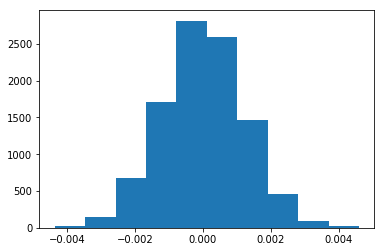

In [31]:
plt.hist(p_diff)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
converted_conv = df2[df2['group'] == 'control'].converted.mean()
treatment_conv = df2[df2['group']=='treatment'].converted.mean()
abs_diff = treatment_conv - converted_conv

p_diff = np.array(p_diff)
(p_diff > abs_diff).mean()



0.90169999999999995

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>>I calculated what proportion of the conversion rate in the bootstrapped data was diffferent then the observed data.  The scientific name is p-value.  

>>A low p-value (≤ 0.05) indicates that the null hypothesis not true.  The p-value in here is very large so we fail to reject the null hypothesis.



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm
convert_old = df2[df2['group'] == 'control'].converted.sum()
convert_new = df2[df2['group'] == 'treatment'].converted.sum()
n_old = df2[df2['group'] == 'control'].converted.size
n_new = df2[df2['group'] == 'treatment'].converted.size
print(convert_old, convert_new, n_new, n_old)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489 17264 145310 145274


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
from scipy.stats import norm
z_score, p_value = \
    sm.stats.proportions_ztest( [ convert_new, convert_old ], \
                                [ n_new, n_old ], \
                                alternative='larger' )

                               
n = norm.ppf(1-(0.05/2))
str_1 = 'To retain 95% significance level Z score can not fall above {}  or below -{}.'.format(n,n)
print(str_1)
print('z-score = ' +str(z_score))
print('p_value = ' +str(p_value))


To retain 95% significance level Z score can not fall above 1.959963984540054  or below -1.959963984540054.
z-score = -1.31092419842
p_value = 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score is 1.19 does not exceed the critical value of 1.9599, so we fail to reject the null hypothesis.  There is no statistical difference between the converstion rates for the control and treatment groups.**  

**The p-value is the same as calculated in part j. A low p-value (≤ 0.05) indicates that the null hypothesis not true.  The p-value in here is very large so we fail to reject the null hypothesis. **

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

>>Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2['intercept'] = 1
df2[['drop', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop(['drop'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
import statsmodels.api as sm

logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Apr 2018   Pseudo R-squ.:               8.077e-06
Time:                        19:21:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

>>P value is calculated with this model is 0.19.  The p-value calculated in parts i and j was 0.9.  

>>The null hypothosis is that the likelihood of converstion for a user landing on the new page is less or equal to the user receiving a converion when landing on the old page.  The alternative hypothesis is that the likelihood of converstion for a user landing on the new page is greater than the user receiving a converstion when landing on the old page. 

>>The null hypothesis associated with logistic regression is that there is no relationship between the dependent and independent variables.  The alternative hypothesis would be the opposite, that there is a relationship.  

>>The difference in pvalues indicate that there is no linear relationship between the converstion rate and the landing page.  




f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**By adding more information such as, age, location etc may make the model more accurate yeilding a linear fit.  It may also give insights that were not expected.  However, correolation does not equate to causation and all information must be reviewed carefully.  **

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [39]:
dfc = pd.read_csv('./countries.csv')
dfj = dfc.set_index('user_id').join(df2.set_index('user_id'),how='inner')
dfj.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
##Create dummies
dfj[['UK', 'US', 'CA']] = pd.get_dummies(dfj['country'])

In [41]:
logit_mod_new = sm.Logit(dfj['converted'],\
    dfj[['intercept', 'ab_page', 'CA', 'UK']])
results_new = logit_mod_new.fit()
results_new.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Apr 2018   Pseudo R-squ.:               2.323e-05
Time:                        19:21:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0099      0.013     -0.743      0.457      -0.036       0.016
UK            -0.0506      0.028     -1.784      0.074      -0.106       0.005
==============================================================================
"""

In [42]:
np.exp(.0099), np.exp(-0.0506)

(1.0099491671175422, 0.95065885803307082)

>>I used the US as a baseline since I live in the US.  Canadians are are essentially likely to convert as their US counterparts and UK users are 5% less likely to convert.  

>>The large p-values indicate that the effect is not statistically significant.  

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
#in a county and received a new page
dfj['CA_n'] = dfj['ab_page']*dfj['CA']
dfj['UK_n'] = dfj['ab_page']*dfj['UK']
dfj['US_n'] = dfj['ab_page']*dfj['US']
dfj.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,CA,CA_n,UK_n,US_n
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,0,1


In [44]:
log_mod2 = sm.Logit(dfj['converted'], \
    dfj[['intercept', 'ab_page', 'CA', 'CA_n', 'UK', 'UK_n']])
results_log2 = log_mod2.fit()
results_log2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 Apr 2018   Pseudo R-squ.:               3.482e-05
Time:                        19:21:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
CA             0.0057      0.019      0.306      0.760      -0.031       0.043
CA_n          -0.0314      0.027     -1.181      0.238      -0.084       0.021
UK            -0.0118      0.040     -0.296      0.767      -0.090       0.066
UK_n          -0.0783      0.057     -1.378      0.168      -0.190       0.033
==============================================================================
"""

In [45]:
lin_mod = sm.OLS(dfj['converted'], \
    dfj[['intercept', 'ab_page', 'CA', 'CA_n', 'UK', 'UK_n']])
results = lin_mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Sun, 22 Apr 2018   Prob (F-statistic):              0.197
Time:                        19:21:07   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1200      0.002     70.530      0.000       0.117       0.123
ab_page        0.0011      0.002      0.477      0.634      -0.004       0.006
CA             0.0006      0.002      0.307      0.759      -0.003       0.004
CA_n          -0.0033      0.003     -1.180      0.238      -0.009       0.002
UK            -0.0012      0.004     -0.296      0.767      -0.009       0.007
UK_n          -0.0080      0.006     -1.360      0.174      -0.020       0.004
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

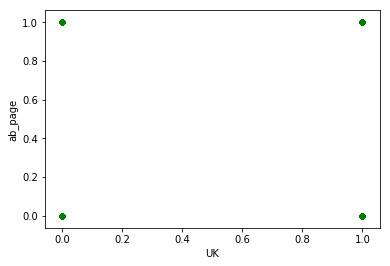

In [47]:
%matplotlib inline

ax1 = dfj.plot(kind='scatter', x='CA', y='ab_page', color='r')
ax2 = dfj.plot(kind='scatter', x='CA_n', y='ab_page', color='b', ax=ax1)
ax3 = dfj.plot(kind='scatter', x='UK', y='ab_page', color='g', ax=ax1)

>>Both the logistic regression and the linear model have high p-values and this indicates that neither effect is statistically significant.  When the linear model is plotted it is evident that there is no linear relationship between conversion and which page is chosen.  

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.